In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix,
                             accuracy_score)
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORT RAW DATA
raw_liked = pd.read_csv("LIKED_FEATURES.csv")
raw_liked.head()

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,0.000347,https://api.spotify.com/v1/audio-analysis/5aFG...,0.601,236933,0.723,5aFGo8wHEntVxFI8IF7Wuj,0.001100,8,0.3460,-4.364,0,0.0384,114.991,4,https://api.spotify.com/v1/tracks/5aFGo8wHEntV...,audio_features,spotify:track:5aFGo8wHEntVxFI8IF7Wuj,0.581
1,0,0.000679,https://api.spotify.com/v1/audio-analysis/0ThY...,0.493,234476,0.943,0ThYrwnekhJLSJBiGPD1L7,0.008970,4,0.1340,-3.321,1,0.0608,96.997,4,https://api.spotify.com/v1/tracks/0ThYrwnekhJL...,audio_features,spotify:track:0ThYrwnekhJLSJBiGPD1L7,0.493
2,0,0.003300,https://api.spotify.com/v1/audio-analysis/1KqE...,0.477,206000,0.955,1KqEnSyj7ZFUfN2HddUZMe,0.000000,0,0.0697,-3.871,1,0.0625,90.525,4,https://api.spotify.com/v1/tracks/1KqEnSyj7ZFU...,audio_features,spotify:track:1KqEnSyj7ZFUfN2HddUZMe,0.715
3,0,0.015100,https://api.spotify.com/v1/audio-analysis/77Mb...,0.606,177768,0.679,77MbZsDaKvJEizcU36WnMu,0.000433,2,0.0962,-7.445,1,0.0321,122.016,4,https://api.spotify.com/v1/tracks/77MbZsDaKvJE...,audio_features,spotify:track:77MbZsDaKvJEizcU36WnMu,0.707
4,0,0.000839,https://api.spotify.com/v1/audio-analysis/2WRk...,0.282,161054,0.843,2WRk6RxETSwdsg2dhtnXxc,0.000030,11,0.0699,-6.002,0,0.1140,175.798,4,https://api.spotify.com/v1/tracks/2WRk6RxETSwd...,audio_features,spotify:track:2WRk6RxETSwdsg2dhtnXxc,0.418


In [3]:
#IMPORT RAW DATA
raw_disliked = pd.read_csv("DISLIKED_FEATURES.csv")
raw_disliked.head()

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,0.1370,https://api.spotify.com/v1/audio-analysis/7Dhv...,0.403,170560,0.711,7DhvNzyMM8jJWcfykG3psB,0.0,8,0.1090,-4.189,1,0.0569,203.803,4,https://api.spotify.com/v1/tracks/7DhvNzyMM8jJ...,audio_features,spotify:track:7DhvNzyMM8jJWcfykG3psB,0.801
1,0,0.6390,https://api.spotify.com/v1/audio-analysis/69AI...,0.586,167480,0.559,69AIpwGNLxr4qS1X5ynx60,0.0,4,0.0872,-6.725,1,0.0500,177.945,4,https://api.spotify.com/v1/tracks/69AIpwGNLxr4...,audio_features,spotify:track:69AIpwGNLxr4qS1X5ynx60,0.437
2,0,0.1820,https://api.spotify.com/v1/audio-analysis/19Zz...,0.590,174681,0.846,19ZzEzb4BVK1wVO4brrmZz,0.0,4,0.5300,-4.251,1,0.0396,146.028,4,https://api.spotify.com/v1/tracks/19ZzEzb4BVK1...,audio_features,spotify:track:19ZzEzb4BVK1wVO4brrmZz,0.733
3,0,0.1470,https://api.spotify.com/v1/audio-analysis/59xd...,0.571,231832,0.618,59xdsxc0QGW6TDA3ZuQ9tS,0.0,10,0.1590,-4.966,1,0.0445,138.030,4,https://api.spotify.com/v1/tracks/59xdsxc0QGW6...,audio_features,spotify:track:59xdsxc0QGW6TDA3ZuQ9tS,0.288
4,0,0.0513,https://api.spotify.com/v1/audio-analysis/4k3l...,0.501,224213,0.815,4k3lPl8YTKuY8c1HelVnm3,0.0,1,0.1060,-4.865,1,0.0436,160.087,4,https://api.spotify.com/v1/tracks/4k3lPl8YTKuY...,audio_features,spotify:track:4k3lPl8YTKuY8c1HelVnm3,0.460


In [4]:
#REMOVE UNNEEDED DATA
clean_liked = raw_liked.drop(labels = ["Unnamed: 0", "track_href", "type", "uri", "analysis_url","duration_ms"], axis = 1)
clean_disliked = raw_disliked.drop(labels = ["Unnamed: 0", "track_href", "type", "uri", "analysis_url","duration_ms"], axis = 1)
clean_liked = clean_liked.set_index("id")
clean_disliked = clean_disliked.set_index("id")
clean_liked.index.names = ["ID"]
clean_disliked.index.names = ["ID"]
print(clean_liked.isna().sum().sum())
print(clean_disliked.isna().sum().sum())

0
0


In [5]:
#CREATE DEPENDENT VARIABLE
clean_liked["liked"] = True
clean_disliked["liked"] = False

In [6]:
#CREATE SINGLE DATAFRAME
data = pd.concat([clean_liked, clean_disliked])

In [7]:
data["liked"] = data["liked"]*1

In [8]:
data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,liked
ID,,,,,,,,,,,,,
5aFGo8wHEntVxFI8IF7Wuj,0.000347,0.601,0.723,0.001100,8,0.3460,-4.364,0,0.0384,114.991,4,0.581,1
0ThYrwnekhJLSJBiGPD1L7,0.000679,0.493,0.943,0.008970,4,0.1340,-3.321,1,0.0608,96.997,4,0.493,1
1KqEnSyj7ZFUfN2HddUZMe,0.003300,0.477,0.955,0.000000,0,0.0697,-3.871,1,0.0625,90.525,4,0.715,1
77MbZsDaKvJEizcU36WnMu,0.015100,0.606,0.679,0.000433,2,0.0962,-7.445,1,0.0321,122.016,4,0.707,1
2WRk6RxETSwdsg2dhtnXxc,0.000839,0.282,0.843,0.000030,11,0.0699,-6.002,0,0.1140,175.798,4,0.418,1


In [9]:
data.shape

(1252, 13)

In [10]:
data.dtypes

acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
liked                 int32
dtype: object

In [11]:
data.isna().sum().sum()

0

In [12]:
data.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,liked
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000
mean,0.254824,0.541556,0.641037,0.213740,4.900958,0.182535,-7.880579,0.605431,0.087134,120.894270,3.890575,0.409696,0.694888
std,0.296969,0.161184,0.224184,0.349844,3.476968,0.131953,4.526841,0.488953,0.089012,31.403587,0.430649,0.236156,0.460639
min,0.000010,0.074600,0.004900,0.000000,0.000000,0.025100,-33.350000,0.000000,0.023200,52.663000,1.000000,0.025800,0.000000
25%,0.014350,0.440000,0.487000,0.000000,2.000000,0.098100,-9.202250,0.000000,0.036700,95.117750,4.000000,0.216000,0.000000
50%,0.110000,0.542000,0.675500,0.000782,5.000000,0.125500,-6.759500,1.000000,0.051100,119.893500,4.000000,0.411500,1.000000
75%,0.451250,0.654000,0.815000,0.361000,8.000000,0.237000,-4.963500,1.000000,0.090600,142.175250,4.000000,0.572500,1.000000
max,0.996000,0.935000,0.990000,0.975000,11.000000,0.929000,-0.818000,1.000000,0.622000,211.893000,5.000000,0.973000,1.000000


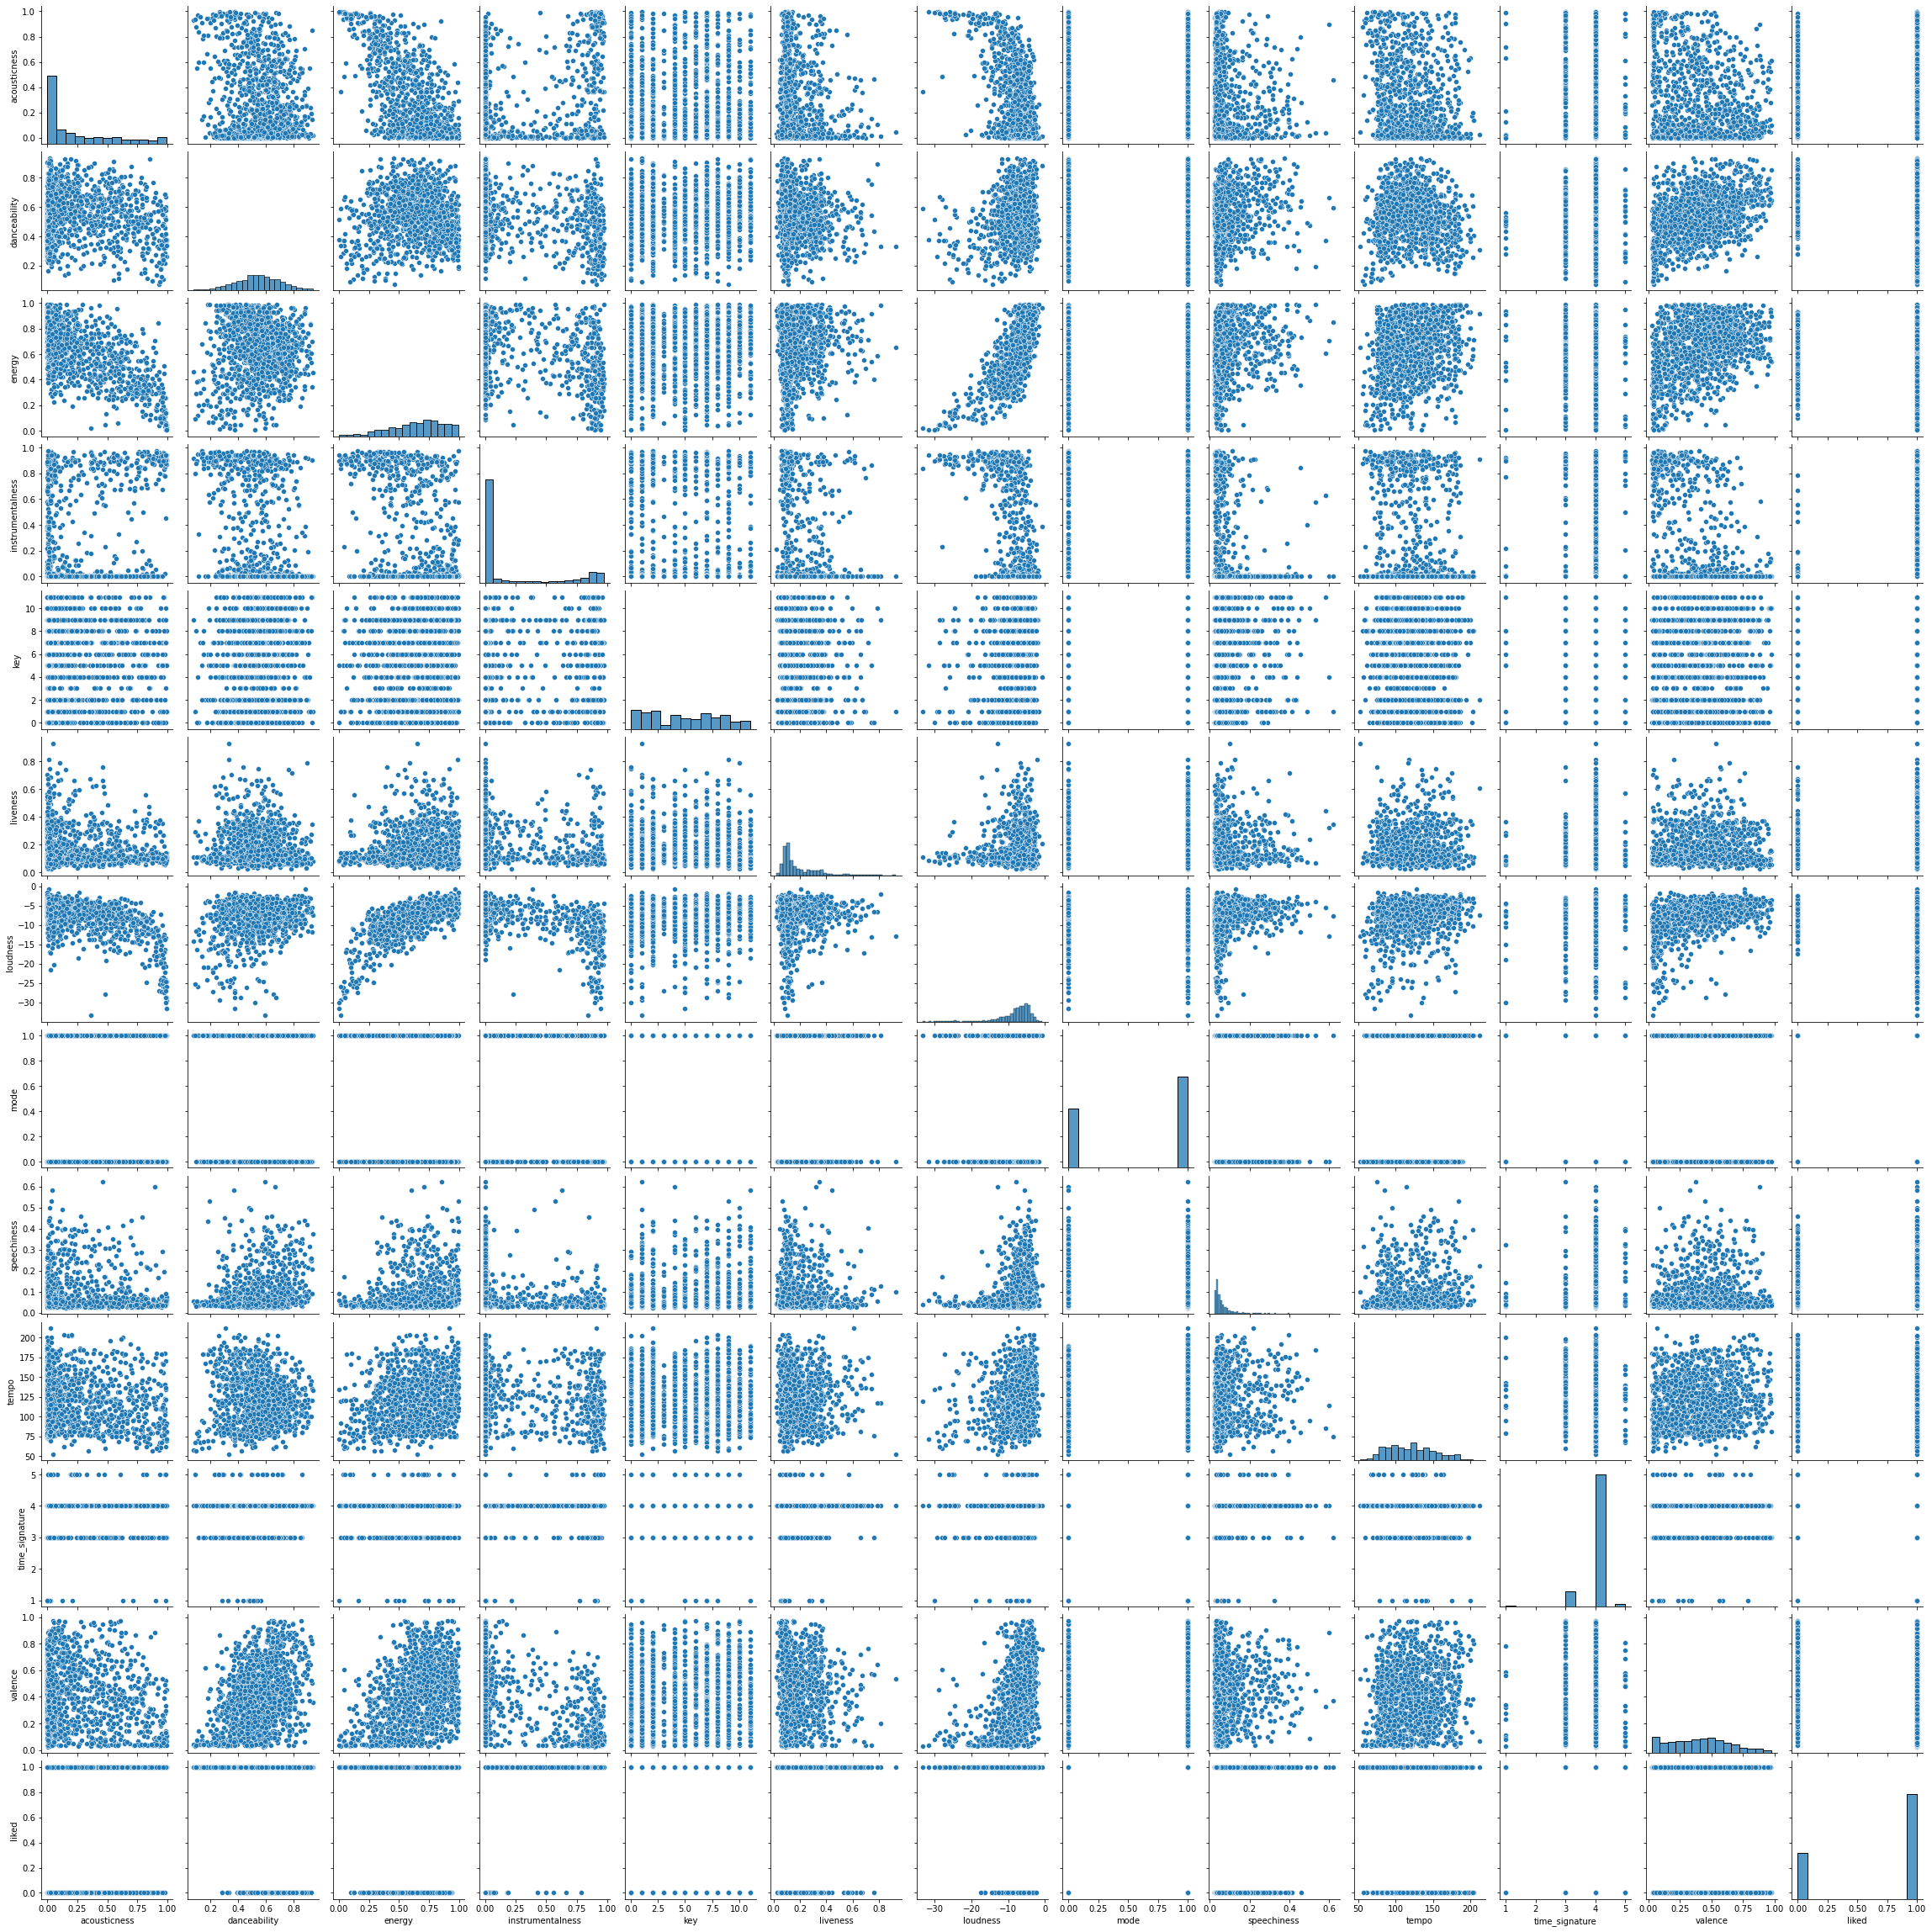

In [13]:
#PAIRPLOT
sns.pairplot(data)
plt.show()

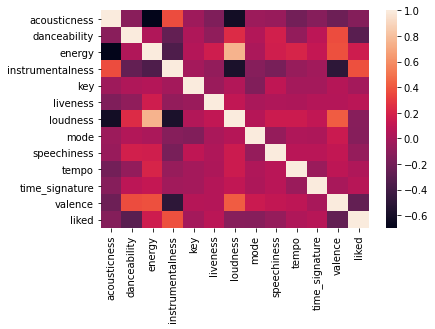

In [14]:
#HEATMAP
heat_map = sns.heatmap(data.corr())

In [15]:
#SPLIT DATA INTO TRAIN AND TEST SETS
train, test = train_test_split(data, train_size = .67, random_state=1, shuffle = True)

In [25]:
#DEFINE VARIABLES AND GENERATE LOGISTICAL REGRESSION MODEL
x_train = train[['acousticness','danceability','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
y_train = train[["liked"]]
logit_mod = sm.Logit(y_train,sm.add_constant(x_train), method = "kwargs")
predictor = logit_mod.fit()
print(predictor.summary())

Optimization terminated successfully.
         Current function value: 0.386798
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  liked   No. Observations:                  838
Model:                          Logit   Df Residuals:                      825
Method:                           MLE   Df Model:                           12
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.3773
Time:                        11:33:36   Log-Likelihood:                -324.14
converged:                       True   LL-Null:                       -520.57
Covariance Type:            nonrobust   LLR p-value:                 1.226e-76
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.5213      1.437     -1.755      0.079      -5.337       0.295
acousticnes

In [26]:
#DEFINE VARIABLES AND TEST MODEL
x_test = test[['acousticness','danceability','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
y_test = test[["liked"]]
y_pred= predictor.predict(sm.add_constant(x_test))
prediction = list(map(round, y_pred))

In [27]:
#CONFUSION MATRIX
c_matrix = confusion_matrix(y_test, prediction)
print(c_matrix)

[[ 70  50]
 [ 39 255]]


In [28]:
#ACCURACY SCORE
print(accuracy_score(y_test, prediction))

0.785024154589372
